# Evaluation

In [21]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from tree_learn.util import load_data
# 设置全局字体
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'stix'  # 数学公式字体
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
os.chdir(os.path.dirname(os.path.abspath("__file__")))
# 数据路径配置 (示例结构)
gt_forest_paths = [
    '../../data/benchmark/L1W.laz',
    '../../data_CULS/benchmark/merged_points.las',
    '../../data_Mergepoints/benchmark/merged_points.las',
    '../../data_NIBIO/benchmark/merged_points.las',
    '../../data_RMIT/benchmark/merged_points.las',
    '../../data_SCION/benchmark/merged_points.las',
    '../../data_TUWIEN/benchmark/merged_points.las'
]

# 每组真实数据对应的两个预测结果路径 (示例)
pred_configs = [
    {'Treelearn': '../../data/results/full_forest_withoutmamba/evaluation/evaluation_results.pt',
     'Ours': '../../data/pipeline/L1W/results/full_forest/evaluation/evaluation_results.pt'},
    {'Treelearn': '../../data_CULS/results/full_forest_withoutmamba/evaluation/evaluation_results.pt',
     'Ours': '../../data_CULS/pipeline/results/full_forest/evaluation/evaluation_results.pt'},
    {'Treelearn': '../../data_Mergepoints/results/full_forest_withoutmamba/evaluation/evaluation_results.pt',
     'Ours': '../../data_Mergepoints/pipeline/results/full_forest/evaluation/evaluation_results.pt'},
    {'Treelearn': '../../data_NIBIO/results/full_forest_withoutmamba/evaluation/evaluation_results.pt',
     'Ours': '../../data_NIBIO/results/results_mamba/full_forest/evaluation/evaluation_results.pt'},
    {'Treelearn': '../../data_RMIT/results/evaluation_withoutmamba_hdbscan/evaluation_results.pt',
     'Ours': '../../data_RMIT/pipeline/results/full_forest/evaluation/evaluation_results.pt'},
    {'Treelearn': '../../data_SCION/results/full_forest_withoutmamba/evaluation/evaluation_results.pt',
     'Ours': '../../data_SCION/pipeline/results/full_forest/evaluation/evaluation_results.pt'},
    {'Treelearn': '../../data_TUWIEN/results/full_forest_withoutmamba/evaluation/evaluation_results.pt',
     'Ours': '../../data_TUWIEN/pipeline/results/full_forest/evaluation/evaluation_results.pt'},
    # 补充剩余5组配置...
]

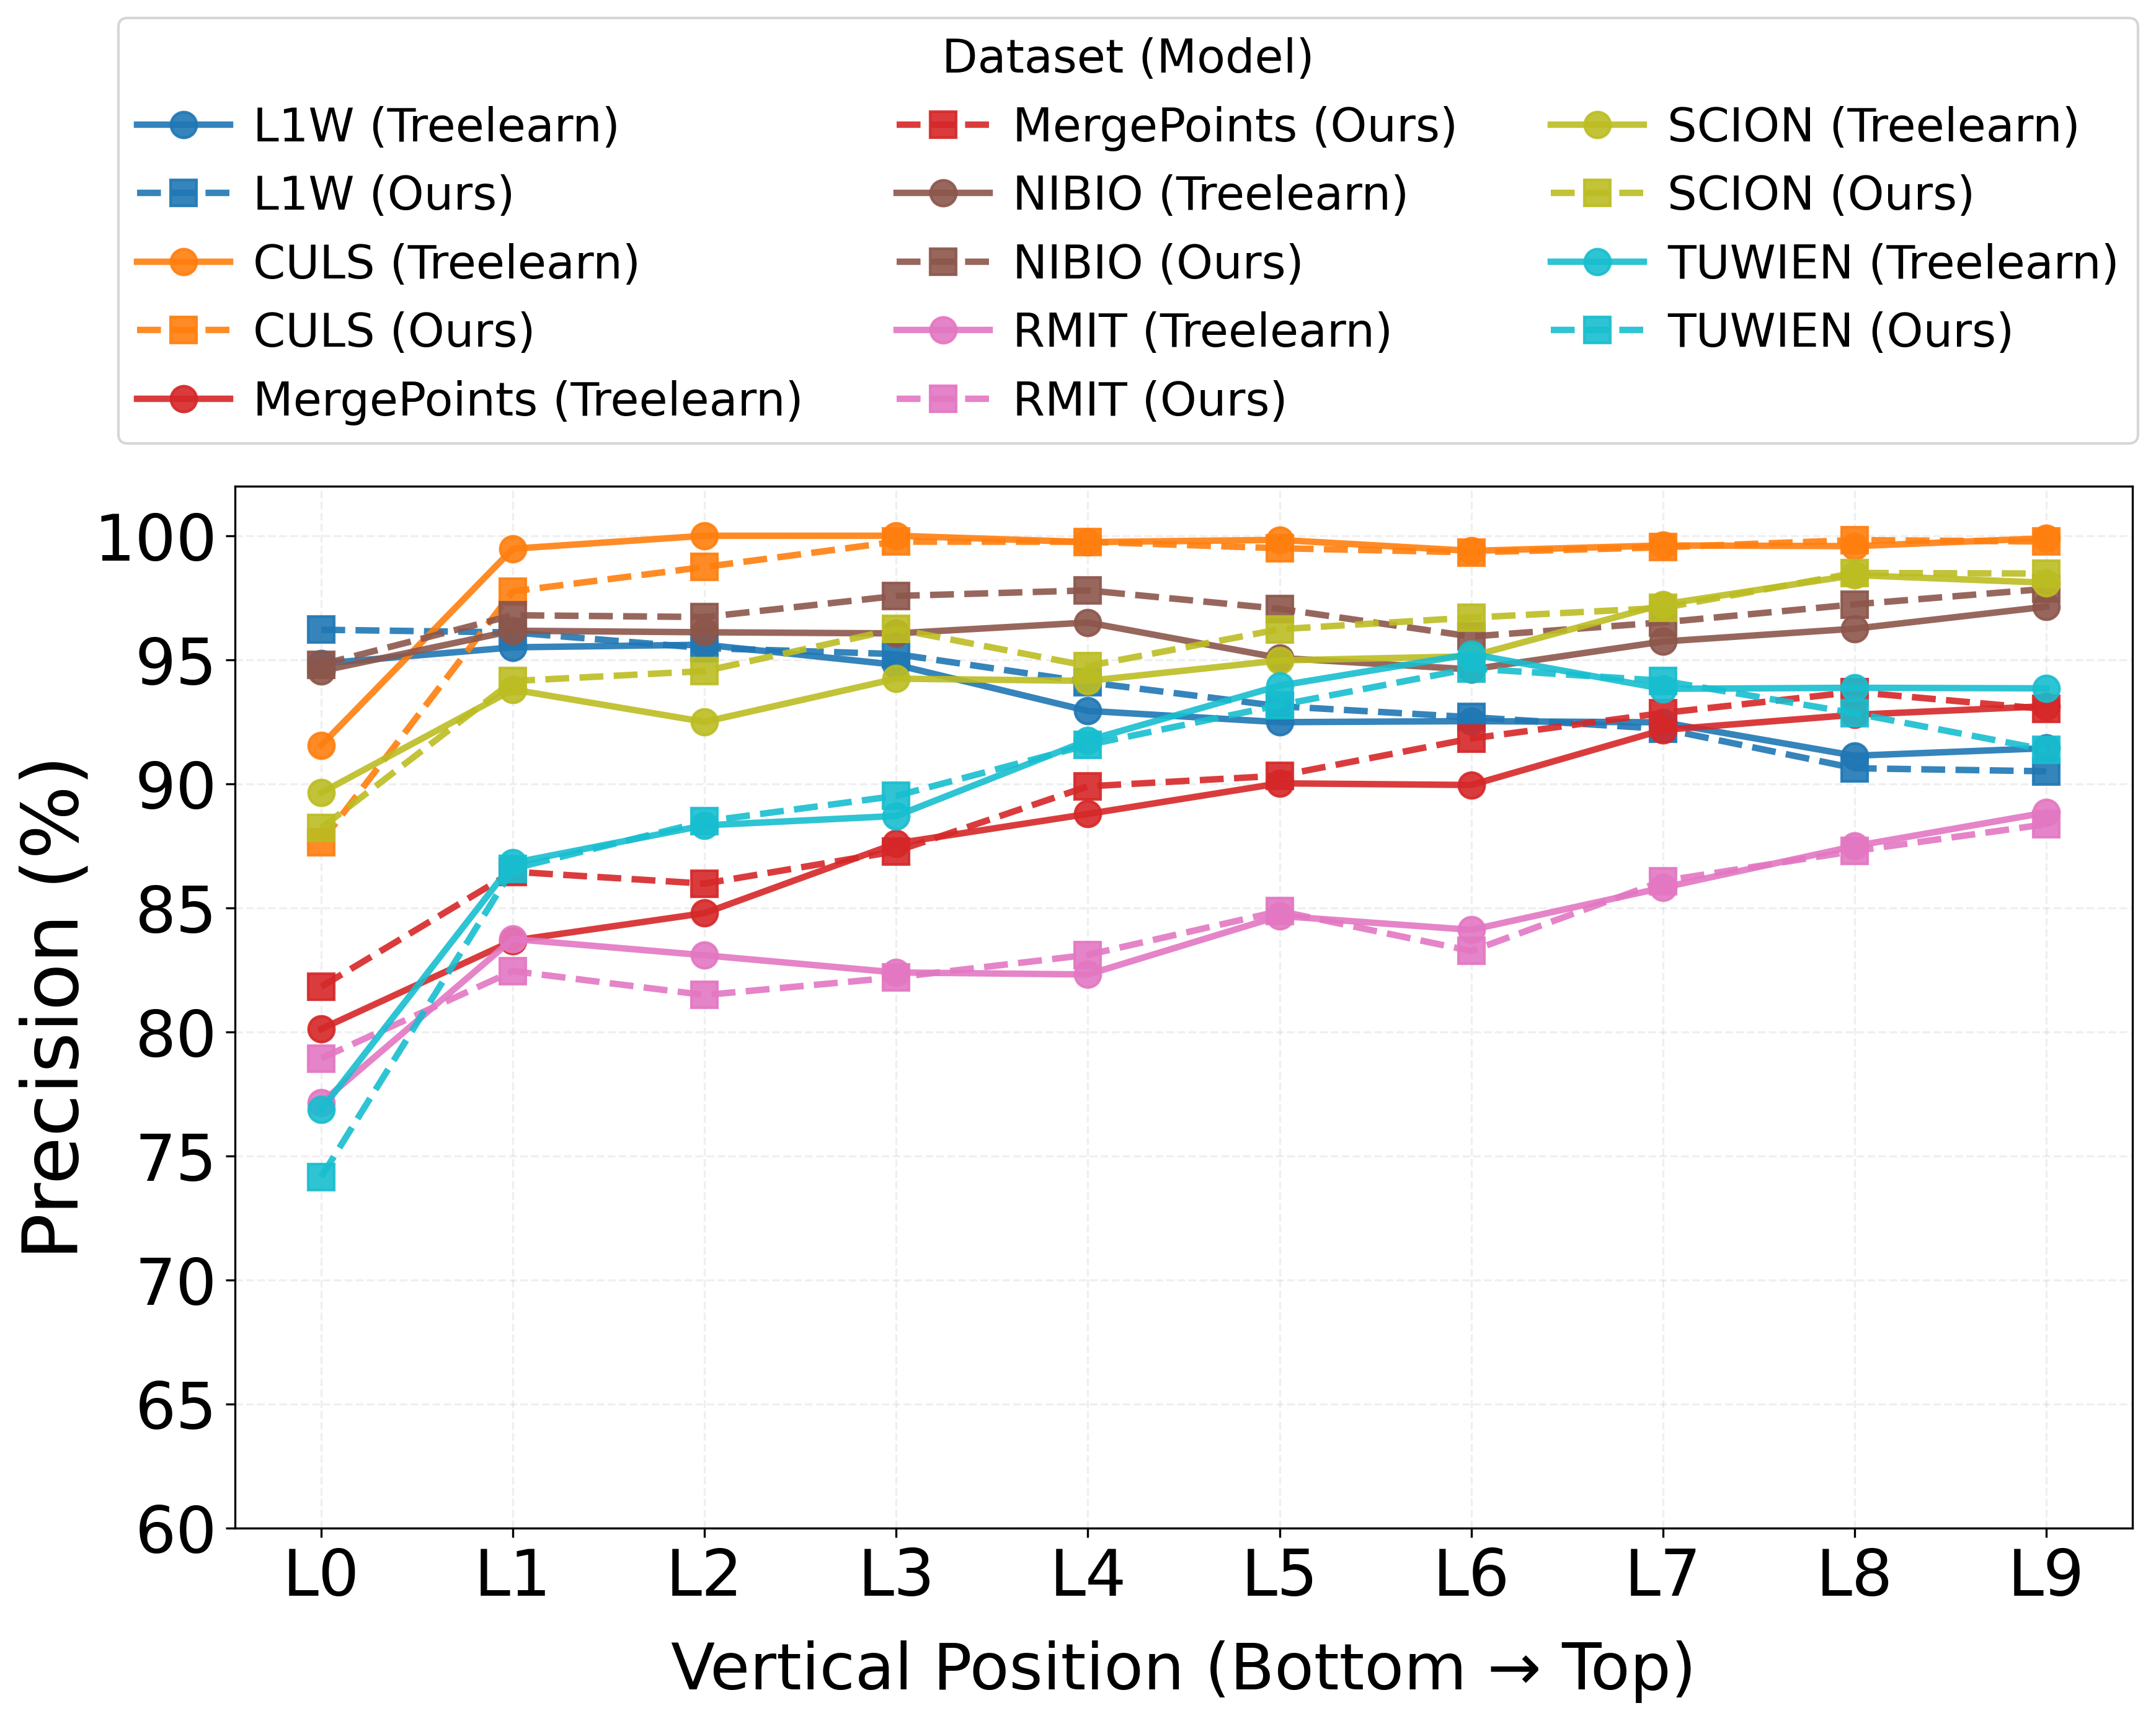

In [39]:
# 可视化参数优化
DATASET_NAMES = ['L1W', 'CULS', 'MergePoints', 'NIBIO', 'RMIT', 'SCION', 'TUWIEN']  # 自定义数据集名称
COLORS = plt.cm.tab10(np.linspace(0, 1, 7))  
LINE_STYLES = ['-', '--']
MARKERS = ['o', 's']
LINE_WIDTH = 2.5
MARKER_SIZE = 10

# 创建画布
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)  # 增大画布尺寸
plt.subplots_adjust(left=0.1, right=0.95, top=0.85, bottom=0.15)

# 遍历每组数据
for group_idx, (gt_path, pred_paths) in enumerate(zip(gt_forest_paths, pred_configs)):
    dataset_name = DATASET_NAMES[group_idx]  # 获取自定义数据集名称
    
    # 遍历每个预测模型
    for model_idx, (model_label, eval_path) in enumerate(pred_paths.items()):
        # 加载评估结果
        eval_results = torch.load(eval_path)
        z_data = eval_results['segmentation_results']['z_partition']
        
        # 提取Precision数据
        precision = z_data.iloc[:, 2:12].mean(0).to_numpy() * 100
        
        # 绘制曲线（自定义标签格式）
        ax.plot(
            precision,
            color=COLORS[group_idx],
            linestyle=LINE_STYLES[model_idx],
            marker=MARKERS[model_idx],
            markersize=MARKER_SIZE,
            linewidth=LINE_WIDTH,
            label=f'{dataset_name} ({model_label})',  # 自定义标签格式
            markevery=1,
            alpha=0.9
        )

# 坐标轴增强设置
ax.set_xlabel("Vertical Position (Bottom → Top)", fontsize=25, labelpad=12)
ax.set_ylabel("Precision (%)", fontsize=30, labelpad=0)
ax.set_ylim(60, 102)
ax.set_xticks(range(10))
ax.set_xticklabels([f'L{i}' for i in range(10)], fontsize=25)
ax.set_yticks(np.arange(60, 101, 5))
ax.set_yticklabels(np.arange(60, 101, 5), fontsize=25)
ax.grid(True, alpha=0.2, linestyle='--')

# 智能图例布局
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    ncol=3,  # 调整为3列布局
    bbox_to_anchor=(0.5, 1.18),  # 提升图例位置
    fontsize=18,
    frameon=True,
    title='Dataset (Model)',
    title_fontsize=20,
    columnspacing=2,
    handletextpad=0.5
)

# 保存输出
plt.savefig(
    '../../plt/precision_comparison.png',
    dpi=300,
    bbox_inches='tight',
    metadata={'CreationDate': None}  # 避免PDF时间戳
)
plt.show()